<a href="https://colab.research.google.com/github/anuskamishra/Custom-Activation-Function/blob/main/MNIST_Custom_Activation(1)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import necessary libraries**

In [ ]:
import numpy as np # linear algebra
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K

## **MNIST Dataset import**

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
X_train, X_test = X_train / 255.0, X_test / 255.0

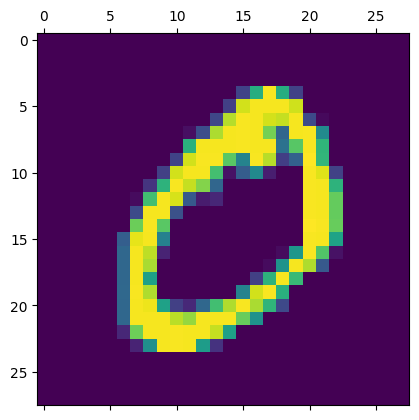

In [ ]:
plt.matshow(X_train[1])

# **Custom Activation Function**
The Activation Function can be modified based on two things:

i) Its classification type ii) No. of Negative values present in dataset iii) Its differentiabilty around 0.

And using these conditions I have created a modified activation function which works as a leaky ReLU first and then utilise that updated values in an ELU function.

Thus the issue of negative value of ReLU is resolved by ELU and then it is wrapped upon Leaky ReLU which fix the “dying ReLU” problem by having a small negative slope (of 0.01,0.05 or so)

In [ ]:
num_labels = len(np.unique(y_train))
print(num_labels)

10


In [ ]:
def multi_af(x):
    return K.maximum(0.05*x,x) # A modified version of RelU which performs good for negative as well as 0-1 values.
# If classification is binary then bin_af function else multi_af function is called
def bin_af(x):
    return 1 / (1 + math.exp(-x))
dropout=0.2

We can also apply a condition that if number of values less than 0 are more than 50% , then do not go for ReLu, else you can perform ReLu to reduce computation time.

# **Model Architecture**

In [ ]:
if num_labels>2:
    model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256),
    tf.keras.layers.Lambda(multi_af),
    tf.keras.layers.Dropout(dropout, input_shape=(2,)),
    tf.keras.layers.ELU(alpha=1.0),
    tf.keras.layers.Dense(num_labels, activation='softmax')
])
else:
     model = tf.keras.models.Sequential([
     tf.keras.layers.Flatten(input_shape=(28, 28)),
     tf.keras.layers.Dense(256),
     tf.keras.layers.Lambda(multi_af),
     tf.keras.layers.Dropout(dropout, input_shape=(2,)),
     tf.keras.layers.ELU(alpha=1.0),
     tf.keras.layers.Dense(num_labels, activation='sigmoid')
])
    

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 lambda (Lambda)             (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 elu (ELU)                   (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trai

## **Model Complilation can be changed based on no. of categories**

In [ ]:
model.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit(X_train, y_train,validation_split=0.1 ,epochs=12,batch_size=64)

Epoch 1/12
844/844 [==============================] - 6s 7ms/step - loss: 0.2938 - accuracy: 0.9149 - val_loss: 0.1286 - val_accuracy: 0.9637
Epoch 2/12
844/844 [==============================] - 10s 12ms/step - loss: 0.1407 - accuracy: 0.9583 - val_loss: 0.0931 - val_accuracy: 0.9735
Epoch 3/12
844/844 [==============================] - 10s 12ms/step - loss: 0.1048 - accuracy: 0.9684 - val_loss: 0.0830 - val_accuracy: 0.9770
Epoch 4/12
844/844 [==============================] - 5s 6ms/step - loss: 0.0848 - accuracy: 0.9742 - val_loss: 0.0800 - val_accuracy: 0.9765
Epoch 5/12
844/844 [==============================] - 6s 7ms/step - loss: 0.0713 - accuracy: 0.9783 - val_loss: 0.0696 - val_accuracy: 0.9787
Epoch 6/12
844/844 [==============================] - 6s 7ms/step - loss: 0.0619 - accuracy: 0.9804 - val_loss: 0.0744 - val_accuracy: 0.9788
Epoch 7/12
844/844 [==============================] - 5s 6ms/step - loss: 0.0546 - accuracy: 0.9836 - val_loss: 0.0716 - val_accuracy: 0.9817
Ep

## **Train and Test Accuracy**

In [ ]:
tf1=model.evaluate(X_train, y_train)
tf2=model.evaluate(X_test, y_test)
print("Train Accuracy is ",tf1[1])
print("Test Accuracy is ",tf2[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0698 - accuracy: 0.9812
Train Accuracy is  0.9936833381652832
Test Accuracy is  0.9811999797821045


## **Train and Test Loss**

In [ ]:
print("Train Loss is ",tf1[0])
print("Test Loss is ",tf2[0])

Train Loss is  0.022953985258936882
Test Loss is  0.0697842389345169


In [ ]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

313/313 [==============================] - 1s 4ms/step


## **Confusion Matrix**

Text(95.72222222222221, 0.5, 'Truth')

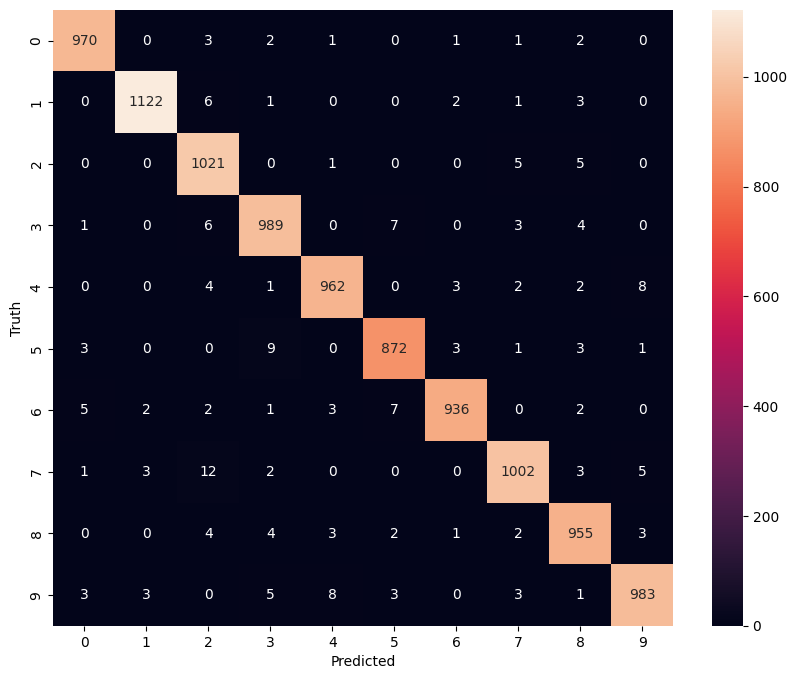

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
plt.figure(figsize = (10,8))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## **F1 Score**

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,y_predicted_labels, average='weighted')

0.9812075203477736

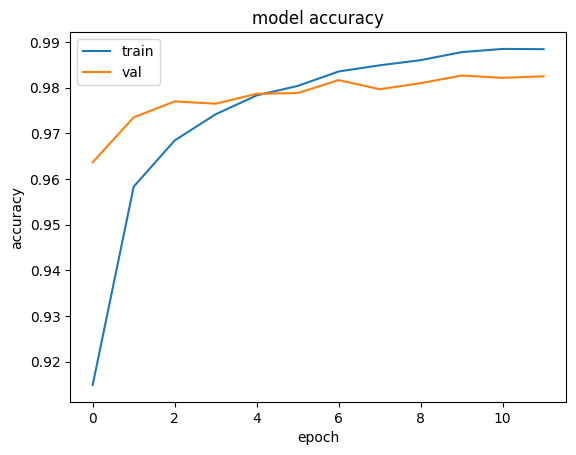

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

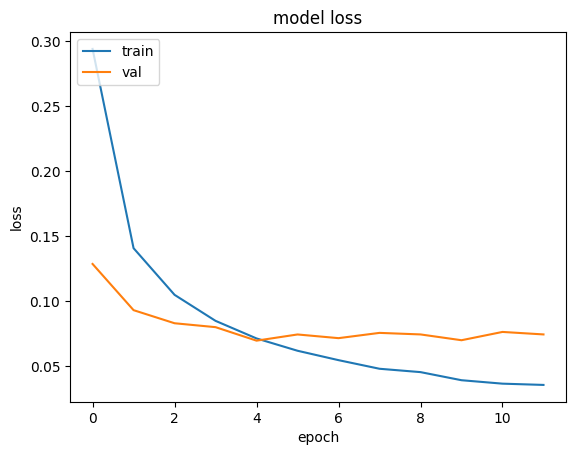

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()